In [33]:
import torch
from models import VAE, loss_function
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np

def get_digit(digit, train):
    test_digits = []
    for data, label in datasets.MNIST('../data', train=train, download=True, transform=transforms.ToTensor()):
        if digit == -1 or label.item() == digit:
            test_digits.append((data, label))
    return test_digits

In [14]:
#batch_size = 3*4
#latent_dim = 20
#z = torch.randn((batch_size, latent_dim))
#x = vae.decode(z).detach()

#for i, xx in enumerate(x):
#    plt.subplot(3,4,i+1)
#    plt.imshow(xx.numpy().reshape((28, 28)), cmap='gray_r')

# Cross" class evaluation?

In [15]:
# Load all vaes
vaes = {}
for i in xrange(10):
    vae = VAE()
    state_dict = torch.load('digit_{}_epoch_80.pth'.format(i))
    vae.load_state_dict(state_dict)
    vaes[i] = vae

In [16]:
batch_size = 16

# Load all MNIST digits
test_digits = {}
test_loaders = {}
for i in xrange(10):
    print 'Loading digit', i
    test_digit = get_digit(i, train=False)
    test_digits[i] = test_digit
    
    test_loader = torch.utils.data.DataLoader(test_digit, batch_size=batch_size, shuffle=True)
    test_loaders[i] = test_loader

Loading digit 0
Loading digit 1
Loading digit 2
Loading digit 3
Loading digit 4
Loading digit 5
Loading digit 6
Loading digit 7
Loading digit 8
Loading digit 9


## Reconstruct a 5 with each VAE

Text(0.5,1,'Reconstruction losses')

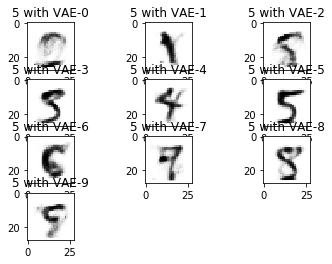

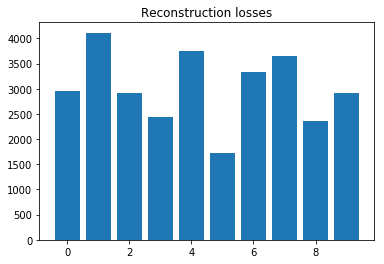

In [26]:
# For one class
input_class = 5
x, l = iter(test_loaders[input_class]).next()
losses = {}
for vae_class in xrange(10):
    reconstruction, mu, logvar = vaes[vae_class](x)
    loss = loss_function(reconstruction, x, mu, logvar)
    losses[vae_class] = loss.item()
    plt.subplot(4,3,vae_class+1)
    plt.imshow(reconstruction[0].detach().numpy().reshape((28, 28)), cmap='gray_r')
    plt.title('{} with VAE-{}'.format(input_class, vae_class))
    
plt.figure()
plt.bar(losses.keys(), losses.values())
plt.title('Reconstruction losses')

## Reconstructing each class with each VAE

Text(0,0.5,'Class to reconstruct')

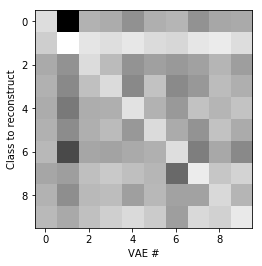

In [58]:
# For one class
iterations = 5

losses = np.zeros((10, 10))
for input_class in xrange(10):
    x, l = iter(test_loaders[input_class]).next()
    for vae_class in xrange(10):
        tmp = []
        for iteration in xrange(iterations):
            reconstruction, mu, logvar = vaes[vae_class](x)
            loss = loss_function(reconstruction, x, mu, logvar)
            tmp.append(loss.item())
        losses[input_class, vae_class] = np.mean(tmp)

plt.imshow(losses, cmap='gray_r')
plt.xlabel('VAE #')
plt.ylabel('Class to reconstruct')

In [60]:
losses[0,0]

1666.20986328125